In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ticker = ["SPY","AAPL","KO","IBM","DIS","MSFT"]
stocks = yf.download(ticker, start="2010-01-01", end="2021-01-01")

[*********************100%***********************]  6 of 6 completed


In [5]:
close = stocks.loc[:,"Close"].copy()

In [6]:
normclose = close.div(close.iloc[0]).mul(100)

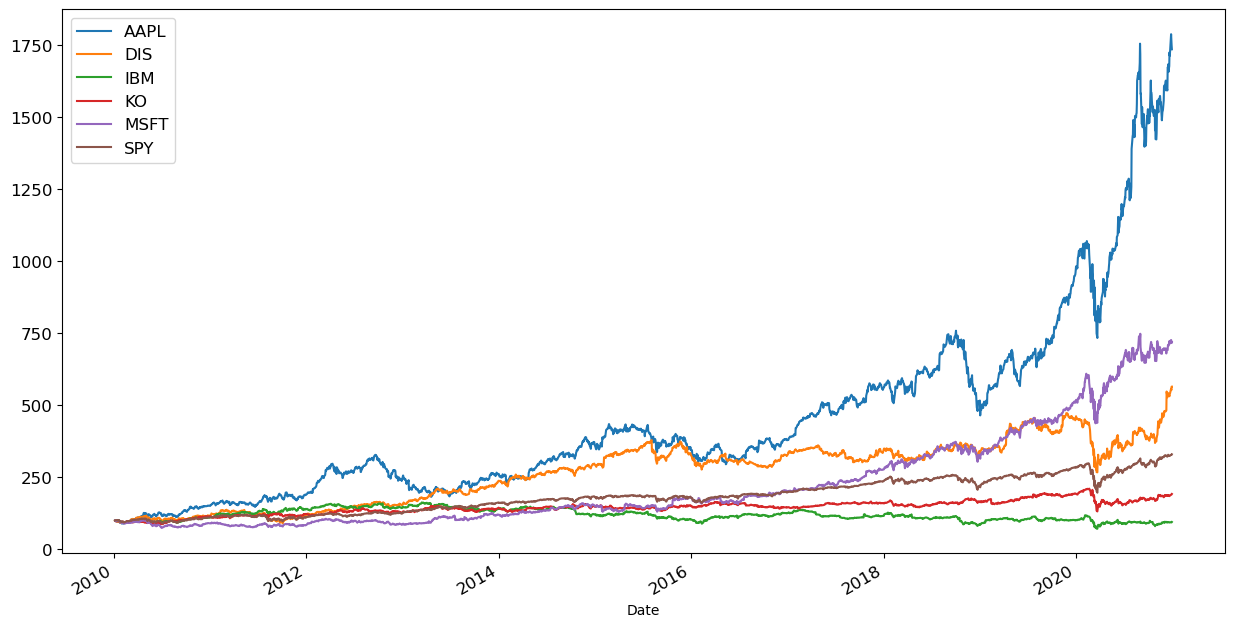

In [7]:
normclose.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [8]:
ret = close.pct_change().dropna()
ret.head()

,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397


In [10]:
ret.describe().T # Transpose

,count,mean,std,min,25%,50%,75%,max
AAPL,2768.0,0.001191,0.017843,-0.128647,-0.007123,0.000903,0.010379,0.119808
DIS,2768.0,0.000749,0.015717,-0.129846,-0.006210,0.000629,0.007901,0.144123
IBM,2768.0,0.000082,0.014132,-0.128507,-0.006321,0.000287,0.006743,0.113010
KO,2768.0,0.000298,0.011088,-0.096725,-0.004698,0.000438,0.005706,0.064796
MSFT,2768.0,0.000841,0.016012,-0.147390,-0.006939,0.000654,0.008636,0.142169
SPY,2768.0,0.000491,0.010909,-0.109424,-0.003532,0.000637,0.005421,0.090603


In [15]:
summary = ret.describe().T.loc[:,["mean","std"]]
summary

,mean,std
AAPL,0.001191,0.017843
DIS,0.000749,0.015717
IBM,0.000082,0.014132
KO,0.000298,0.011088
MSFT,0.000841,0.016012
SPY,0.000491,0.010909


In [16]:
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"]*np.sqrt(252)
summary

,mean,std
AAPL,0.300134,0.283242
DIS,0.188696,0.249504
IBM,0.020648,0.224345
KO,0.075091,0.176009
MSFT,0.211915,0.254185
SPY,0.123754,0.173170


<AxesSubplot: xlabel='std', ylabel='mean'>

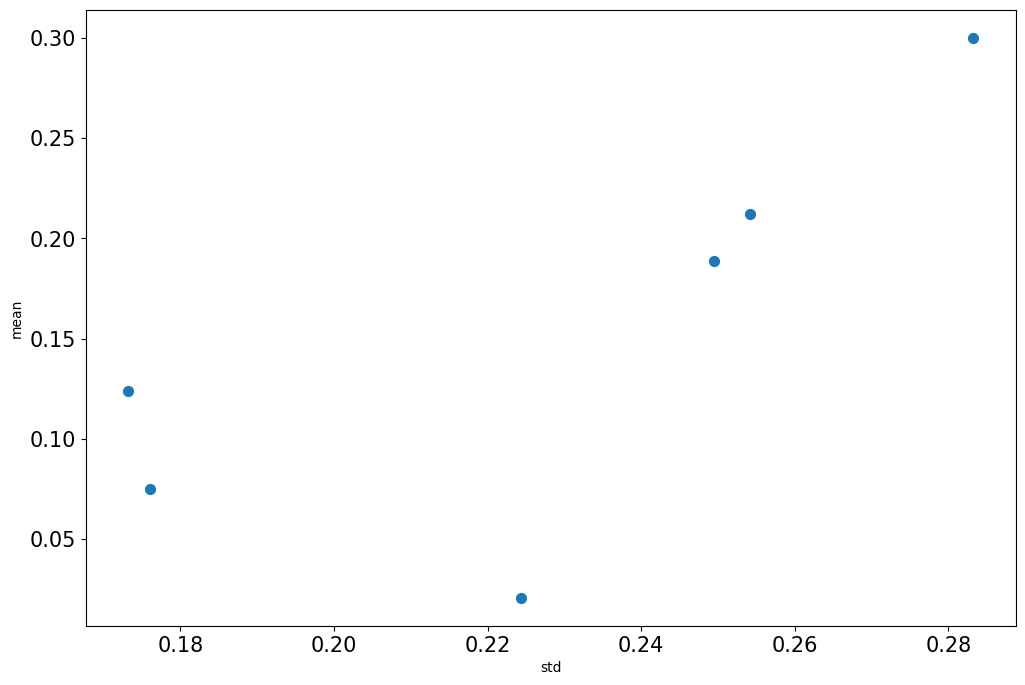

In [18]:
summary.plot.scatter(x="std", y="mean", figsize=(12,8), s=50, fontsize=15)